In [ ]:
!pip install tensorflow pydot graphviz

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model # Changed import statement
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

In [ ]:
stock_name = 'TSM'

In [ ]:
df1 = pd.read_csv('/content/stock_tweets_final.csv', encoding='latin-1') # Try reading with 'latin-1' encoding

In [ ]:
df1.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 22:40:47+00:00,A group of lawmakers led by Sen. Elizabeth War...,SRF,SRF.com
1,2022-09-29 18:34:51+00:00,Todayâs drop in $SPX is a perfect example of...,SRF,SRF.com
2,2022-09-29 13:38:47+00:00,Wage inflation â¬ï¸ profit margin â¬ï¸\n$S...,SRF,SRF.com
3,2022-09-29 13:04:39+00:00,*AMAZON TO LOAN OVER $150M TO SMALL BUSINESSES...,SRF,SRF.com
4,2022-09-29 06:58:00+00:00,"ð³ news:\n\n- BoE buys bonds, saves pensions...",SRF,SRF.com


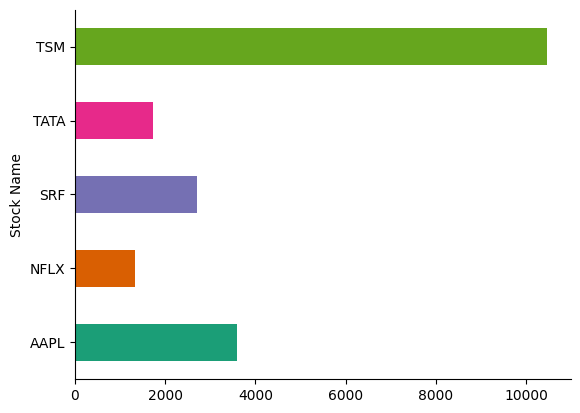

In [ ]:
# @title Stock Name

from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('Stock Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
contraction_dict = {
    "wasn't": "was not",
    "we're": "we are",
    "we'll": "we will",
    "we'd": "we would",
    "weren't": "were not",
    "what's": "what is",
    "won't": "will not",
    "wouldn't": "would not",
    "you're": "you are",
    "you'll": "you will",
    "you'd": "you would",
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he's": "he is",
    "he'll": "he will",
    "he'd": "he would",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "mustn't": "must not",
    "shan't": "shall not",
    "she's": "she is",
    "she'll": "she will",
    "she'd": "she would",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they're": "they are",
    "they'll": "they will",
    "they'd": "they would",
}

def contractions_manual(text):
    words = text.split()
    expanded_words = [contraction_dict[word] if word in contraction_dict else word for word in words]
    return ' '.join(expanded_words)

# Apply the function to the 'text' column
df1['Tweets'] = df1['Tweet'].apply(contractions_manual)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize

df1['tokens_tweet'] = df1['Tweet'].apply(word_tokenize)

nltk.download('words')

english_words = set(words.words())

def remove_gibberish(tokens):
    cleaned_tokens = [token for token in tokens if token.lower() in english_words]
    return cleaned_tokens
df1['tokens_tweet'] = df1["tokens_tweet"].apply(remove_gibberish)

nltk.data.path.append('/kaggle/working/nltk_data')
from nltk.stem import WordNetLemmatizer
nltk.download('all')
nltk.download('wordnet')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]  

True

In [ ]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df1['tokens_tweet'] = df1["tokens_tweet"].apply(remove_stopwords)

import spacy

nlp = spacy.load("en_core_web_sm")
def lemmatize_tokens(tokens):
    text = " ".join(tokens)

    doc = nlp(text)

    lemmas = [token.lemma_ for token in doc]

    return lemmas

df1['tweets_lemmatized'] = df1["tokens_tweet"].apply(lemmatize_tokens)

In [ ]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")
df1['pos_tags'] = df1['tweets_lemmatized'].apply(lambda tokens: [(token.text, token.pos_) for token in nlp(" ".join(tokens))])

df1['pos_tags'].sample()

nlp = spacy.load("en_core_web_sm")
def custom_chunking(tags):
    noun_phrases = []
    current_chunk = []
    for token, pos in tags:
        if pos.startswith('N'):
            current_chunk.append(token)
        elif current_chunk:
            noun_phrases.append(current_chunk)
            current_chunk = []
    if current_chunk:
        noun_phrases.append(current_chunk)
    return noun_phrases
df1['noun_phrases'] = df1['pos_tags'].apply(custom_chunking)

df1['noun_phrases_text'] = df1['noun_phrases'].apply(lambda phrases: [' '.join([token for token in phrases]) for phrases in phrases])

In [ ]:
df1['tfidf_text'] = df1['tweets_lemmatized'].apply(lambda tokens: ' '.join(tokens))
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['tfidf_text'])
tfidf_features = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)
non_zero_count = np.count_nonzero(tfidf_df.values)

print("Number of non-zero values in tfidf_df:", non_zero_count)

Number of non-zero values in tfidf_df: 135124


In [ ]:
df1.head()

,Date,Tweet,Stock Name,Company Name,Tweets,tokens_tweet,tweets_lemmatized,pos_tags,noun_phrases,noun_phrases_text,tfidf_text
0,2022-09-29 22:40:47+00:00,A group of lawmakers led by Sen. Elizabeth War...,SRF,SRF.com,A group of lawmakers led by Sen. Elizabeth War...,"[group, led, Warren, Federal, Trade, Commissio...","[group, lead, Warren, Federal, Trade, Commissi...","[(group, NOUN), (lead, VERB), (Warren, PROPN),...","[[group], [acquisition], [letter]]","[group, acquisition, letter]",group lead Warren Federal Trade Commission rej...
1,2022-09-29 18:34:51+00:00,Todayâs drop in $SPX is a perfect example of...,SRF,SRF.com,Todayâs drop in $SPX is a perfect example of...,"[drop, perfect, example, turn, lower, finally,...","[drop, perfect, example, turn, lower, finally,...","[(drop, VERB), (perfect, ADJ), (example, NOUN)...","[[example], [begin], [damage], [market, drive]]","[example, begin, damage, market drive]",drop perfect example turn lower finally drop b...
2,2022-09-29 13:38:47+00:00,Wage inflation â¬ï¸ profit margin â¬ï¸\n$S...,SRF,SRF.com,Wage inflation â¬ï¸ profit margin â¬ï¸ $SR...,"[Wage, inflation, profit, margin]","[wage, inflation, profit, margin]","[(wage, VERB), (inflation, NOUN), (profit, NOU...","[[inflation, profit, margin]]",[inflation profit margin],wage inflation profit margin
3,2022-09-29 13:04:39+00:00,*AMAZON TO LOAN OVER $150M TO SMALL BUSINESSES...,SRF,SRF.com,*AMAZON TO LOAN OVER $150M TO SMALL BUSINESSES...,"[LOAN, SMALL, NEXT]","[loan, SMALL, NEXT]","[(loan, NOUN), (SMALL, PROPN), (NEXT, PROPN)]",[[loan]],[loan],loan SMALL NEXT
4,2022-09-29 06:58:00+00:00,"ð³ news:\n\n- BoE buys bonds, saves pensions...",SRF,SRF.com,"ð³ news: - BoE buys bonds, saves pensions? -...","[news, Mortgage, leave, Politician, stock, ban...","[news, Mortgage, leave, politician, stock, ban...","[(news, NOUN), (Mortgage, PROPN), (leave, VERB...","[[news], [politician, stock, ban, bill], [kind...","[news, politician stock ban bill, kindle, rece...",news Mortgage leave politician stock ban bill ...


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    text = ' '.join(text)
    sentiment = analyzer.polarity_scores(text)
    return sentiment

df1['sentiment_scores'] = df1['tweets_lemmatized'].apply(get_sentiment_scores)
df1['sentiment'] = df1['sentiment_scores'].apply(lambda x: x['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Clustering**

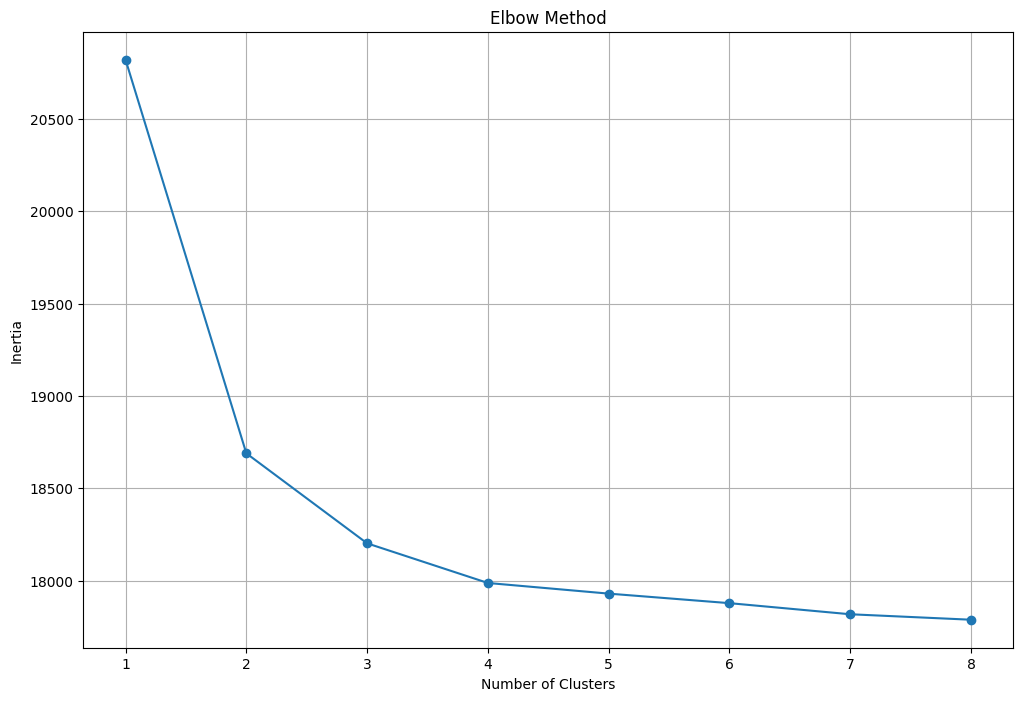

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = pd.concat([df1['sentiment'], tfidf_df], axis=1)

explained_variance_threshold = 0.95

pca = PCA()

pca.fit(X)

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance)

optimal_components = np.argmax(cumulative_explained_variance >= explained_variance_threshold) + 1
optimal_components

pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X)

iner = []
max_clusters = 8

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    iner.append(kmeans.inertia_)
plt.figure(figsize=(12, 8))
plt.plot(range(1, max_clusters + 1), iner, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

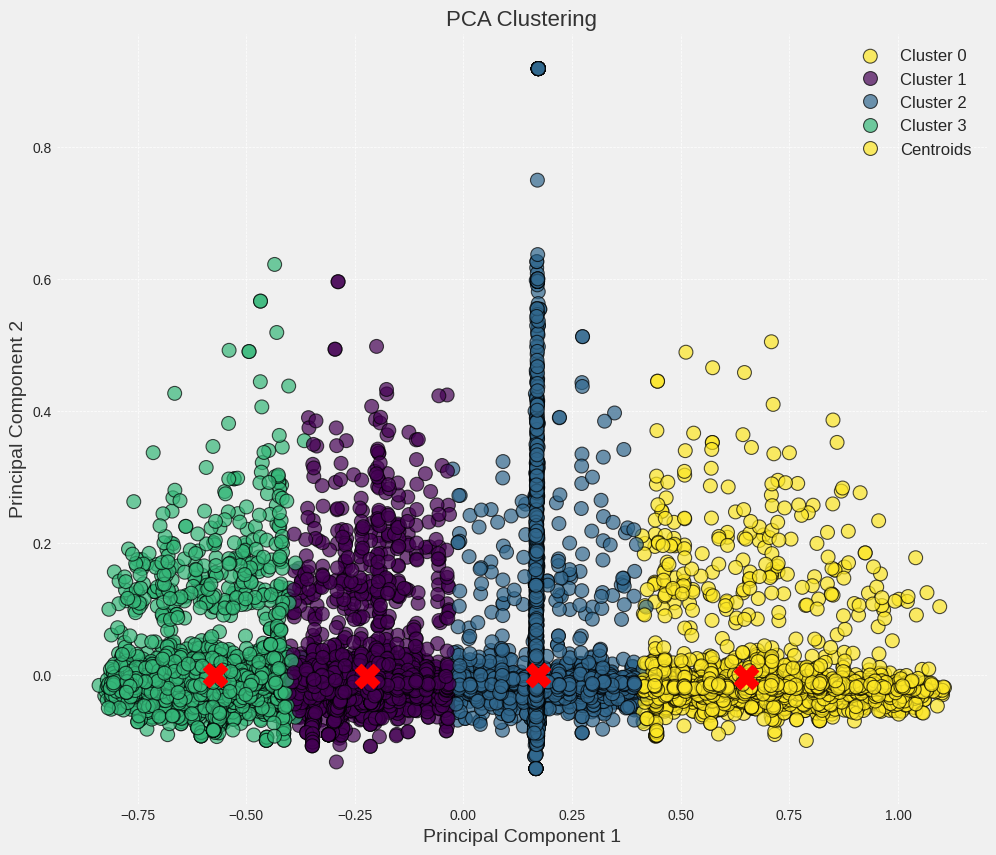

In [ ]:

# Assuming X_pca is your PCA-transformed data and optimal_clusters is defined
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Applying a different background style
plt.style.use('seaborn-darkgrid')

# Create a figure with a custom background color
fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor('#f0f0f0')  # Light grey background

# Plotting the scatter plot with Seaborn
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=100, alpha=0.7, edgecolor='k', ax=ax)

# Adding centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Setting titles and labels
plt.title('PCA Clustering', fontsize=16, color='#333333')
plt.xlabel('Principal Component 1', fontsize=14, color='#333333')
plt.ylabel('Principal Component 2', fontsize=14, color='#333333')

# Improving legend
legend_labels = [f'Cluster {i}' for i in range(optimal_clusters)] + ['Centroids']
plt.legend(legend_labels, loc='best', fontsize=12, facecolor='#f0f0f0', edgecolor='black')

# Customizing grid and background
ax.set_facecolor('#f0f0f0')  # Light grey background for plot area
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()


In [ ]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)
plt.figure(figsize=(9, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, optimal_clusters))

for cluster_num in range(optimal_clusters):
    cluster_points = X_pca[cluster_labels == cluster_num]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=colors[cluster_num], label=f'Cluster {cluster_num + 1}')

plt.title("PCA K-Means Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df = df1[df1['Stock Name'] == stock_name]
print(df.shape)
df.head()

(10470, 13)


,Date,Tweet,Stock Name,Company Name,Tweets,tokens_tweet,tweets_lemmatized,pos_tags,noun_phrases,noun_phrases_text,tfidf_text,sentiment_scores,sentiment
9365,2022-09-29 22:23:02+00:00,EG vs FNC is a deadly matchup.\n\nEG using the...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,EG vs FNC is a deadly matchup. EG using their ...,"[deadly, cutting, studio, audio, night, delay,...","[deadly, cut, studio, audio, night, delay, inf...","[(deadly, ADJ), (cut, VERB), (studio, NOUN), (...","[[studio, audio, night], [pause], [league]]","[studio audio night, pause, league]",deadly cut studio audio night delay infinitely...,"{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...",-0.5267
9366,2022-09-29 21:50:16+00:00,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,"[ken, seething]","[ken, seething]","[(ken, PROPN), (seething, PROPN)]",[],[],ken seething,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
9367,2022-09-29 21:13:20+00:00,I keep looking at the current #R6NAL standings...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,I keep looking at the current #R6NAL standings...,"[keep, looking, current, still, ca, believe, s...","[keep, look, current, still, can, believe, see...","[(keep, VERB), (look, VERB), (current, ADJ), (...",[],[],keep look current still can believe see anythi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
9368,2022-09-29 19:35:26+00:00,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,[cool],[cool],"[(cool, ADJ)]",[],[],cool,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3182
9369,2022-09-29 19:19:05+00:00,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,"[could, come, last, summit, covid]","[could, come, last, summit, covid]","[(could, AUX), (come, VERB), (last, ADJ), (sum...","[[summit, covid]]",[summit covid],could come last summit covid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")
df1['kmeans_clusters'] = cluster_labels
df1['tweets'] = df['Tweet']

Silhouette Score: 0.04249992605919685


# New Section

In [ ]:
print(df1.shape)
df1.head()


(19835, 15)


,Date,Tweet,Stock Name,Company Name,Tweets,tokens_tweet,tweets_lemmatized,pos_tags,noun_phrases,noun_phrases_text,tfidf_text,sentiment_scores,sentiment,kmeans_clusters,tweets
0,2022-09-29 22:40:47+00:00,A group of lawmakers led by Sen. Elizabeth War...,SRF,SRF.com,A group of lawmakers led by Sen. Elizabeth War...,"[group, led, Warren, Federal, Trade, Commissio...","[group, lead, Warren, Federal, Trade, Commissi...","[(group, NOUN), (lead, VERB), (Warren, PROPN),...","[[group], [acquisition], [letter]]","[group, acquisition, letter]",group lead Warren Federal Trade Commission rej...,"{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...",-0.4019,3,NaN
1,2022-09-29 18:34:51+00:00,Todayâs drop in $SPX is a perfect example of...,SRF,SRF.com,Todayâs drop in $SPX is a perfect example of...,"[drop, perfect, example, turn, lower, finally,...","[drop, perfect, example, turn, lower, finally,...","[(drop, VERB), (perfect, ADJ), (example, NOUN)...","[[example], [begin], [damage], [market, drive]]","[example, begin, damage, market drive]",drop perfect example turn lower finally drop b...,"{'neg': 0.417, 'neu': 0.304, 'pos': 0.278, 'co...",-0.2960,3,NaN
2,2022-09-29 13:38:47+00:00,Wage inflation â¬ï¸ profit margin â¬ï¸\n$S...,SRF,SRF.com,Wage inflation â¬ï¸ profit margin â¬ï¸ $SR...,"[Wage, inflation, profit, margin]","[wage, inflation, profit, margin]","[(wage, VERB), (inflation, NOUN), (profit, NOU...","[[inflation, profit, margin]]",[inflation profit margin],wage inflation profit margin,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,0,NaN
3,2022-09-29 13:04:39+00:00,*AMAZON TO LOAN OVER $150M TO SMALL BUSINESSES...,SRF,SRF.com,*AMAZON TO LOAN OVER $150M TO SMALL BUSINESSES...,"[LOAN, SMALL, NEXT]","[loan, SMALL, NEXT]","[(loan, NOUN), (SMALL, PROPN), (NEXT, PROPN)]",[[loan]],[loan],loan SMALL NEXT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,NaN
4,2022-09-29 06:58:00+00:00,"ð³ news:\n\n- BoE buys bonds, saves pensions...",SRF,SRF.com,"ð³ news: - BoE buys bonds, saves pensions? -...","[news, Mortgage, leave, Politician, stock, ban...","[news, Mortgage, leave, politician, stock, ban...","[(news, NOUN), (Mortgage, PROPN), (leave, VERB...","[[news], [politician, stock, ban, bill], [kind...","[news, politician stock ban bill, kindle, rece...",news Mortgage leave politician stock ban bill ...,"{'neg': 0.458, 'neu': 0.542, 'pos': 0.0, 'comp...",-0.8750,3,NaN


In [ ]:
df = df1[df1['Stock Name'] == stock_name]
print(df.shape)
df.head()

(10470, 15)


,Date,Tweet,Stock Name,Company Name,Tweets,tokens_tweet,tweets_lemmatized,pos_tags,noun_phrases,noun_phrases_text,tfidf_text,sentiment_scores,sentiment,kmeans_clusters,tweets
9365,2022-09-29 22:23:02+00:00,EG vs FNC is a deadly matchup.\n\nEG using the...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,EG vs FNC is a deadly matchup. EG using their ...,"[deadly, cutting, studio, audio, night, delay,...","[deadly, cut, studio, audio, night, delay, inf...","[(deadly, ADJ), (cut, VERB), (studio, NOUN), (...","[[studio, audio, night], [pause], [league]]","[studio audio night, pause, league]",deadly cut studio audio night delay infinitely...,"{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...",-0.5267,3,EG vs FNC is a deadly matchup.\n\nEG using the...
9366,2022-09-29 21:50:16+00:00,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,"[ken, seething]","[ken, seething]","[(ken, PROPN), (seething, PROPN)]",[],[],ken seething,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...
9367,2022-09-29 21:13:20+00:00,I keep looking at the current #R6NAL standings...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,I keep looking at the current #R6NAL standings...,"[keep, looking, current, still, ca, believe, s...","[keep, look, current, still, can, believe, see...","[(keep, VERB), (look, VERB), (current, ADJ), (...",[],[],keep look current still can believe see anythi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,I keep looking at the current #R6NAL standings...
9368,2022-09-29 19:35:26+00:00,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,[cool],[cool],"[(cool, ADJ)]",[],[],cool,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3182,0,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...
9369,2022-09-29 19:19:05+00:00,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,"[could, come, last, summit, covid]","[could, come, last, summit, covid]","[(could, AUX), (come, VERB), (last, ADJ), (sum...","[[summit, covid]]",[summit covid],could come last summit covid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...


In [ ]:
sent_df = df.copy()
sent_df["sentiment_score"] = ''
sent_df["Negative"] = ''
sent_df["Neutral"] = ''
sent_df["Positive"] = ''
sent_df.head()

,Date,Tweet,Stock Name,Company Name,Tweets,tokens_tweet,tweets_lemmatized,pos_tags,noun_phrases,noun_phrases_text,tfidf_text,sentiment_scores,sentiment,kmeans_clusters,tweets,sentiment_score,Negative,Neutral,Positive
9365,2022-09-29 22:23:02+00:00,EG vs FNC is a deadly matchup.\n\nEG using the...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,EG vs FNC is a deadly matchup. EG using their ...,"[deadly, cutting, studio, audio, night, delay,...","[deadly, cut, studio, audio, night, delay, inf...","[(deadly, ADJ), (cut, VERB), (studio, NOUN), (...","[[studio, audio, night], [pause], [league]]","[studio audio night, pause, league]",deadly cut studio audio night delay infinitely...,"{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...",-0.5267,3,EG vs FNC is a deadly matchup.\n\nEG using the...,,,,
9366,2022-09-29 21:50:16+00:00,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,"[ken, seething]","[ken, seething]","[(ken, PROPN), (seething, PROPN)]",[],[],ken seething,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,,,,
9367,2022-09-29 21:13:20+00:00,I keep looking at the current #R6NAL standings...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,I keep looking at the current #R6NAL standings...,"[keep, looking, current, still, ca, believe, s...","[keep, look, current, still, can, believe, see...","[(keep, VERB), (look, VERB), (current, ADJ), (...",[],[],keep look current still can believe see anythi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,I keep looking at the current #R6NAL standings...,,,,
9368,2022-09-29 19:35:26+00:00,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,[cool],[cool],"[(cool, ADJ)]",[],[],cool,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3182,0,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,,,,
9369,2022-09-29 19:19:05+00:00,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,"[could, come, last, summit, covid]","[could, come, last, summit, covid]","[(could, AUX), (come, VERB), (last, ADJ), (sum...","[[summit, covid]]",[summit covid],could come last summit covid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,,,,


In [ ]:
%%time
sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in sent_df.iterrows():  # Use iterrows() to iterate over DataFrame rows
    try:
        sentence_i = unicodedata.normalize('NFKD', row['Tweet'])  # Access 'Tweet' from the row
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sent_df.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        sent_df.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print(sent_df.loc[indx, 'Tweet'])  # Use indx for consistency
        print(indx)
        break

CPU times: user 6.63 s, sys: 31.8 ms, total: 6.66 s
Wall time: 8.55 s


In [ ]:
sent_df.head()

,Date,Tweet,Stock Name,Company Name,Tweets,tokens_tweet,tweets_lemmatized,pos_tags,noun_phrases,noun_phrases_text,tfidf_text,sentiment_scores,sentiment,kmeans_clusters,tweets,sentiment_score,Negative,Neutral,Positive
9365,2022-09-29 22:23:02+00:00,EG vs FNC is a deadly matchup.\n\nEG using the...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,EG vs FNC is a deadly matchup. EG using their ...,"[deadly, cutting, studio, audio, night, delay,...","[deadly, cut, studio, audio, night, delay, inf...","[(deadly, ADJ), (cut, VERB), (studio, NOUN), (...","[[studio, audio, night], [pause], [league]]","[studio audio night, pause, league]",deadly cut studio audio night delay infinitely...,"{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...",-0.5267,3,EG vs FNC is a deadly matchup.\n\nEG using the...,-0.4215,0.093,0.907,0.0
9366,2022-09-29 21:50:16+00:00,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,"[ken, seething]","[ken, seething]","[(ken, PROPN), (seething, PROPN)]",[],[],ken seething,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,0.0,0.0,1.0,0.0
9367,2022-09-29 21:13:20+00:00,I keep looking at the current #R6NAL standings...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,I keep looking at the current #R6NAL standings...,"[keep, looking, current, still, ca, believe, s...","[keep, look, current, still, can, believe, see...","[(keep, VERB), (look, VERB), (current, ADJ), (...",[],[],keep look current still can believe see anythi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,I keep looking at the current #R6NAL standings...,0.4404,0.0,0.929,0.071
9368,2022-09-29 19:35:26+00:00,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,[cool],[cool],"[(cool, ADJ)]",[],[],cool,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3182,0,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,0.3182,0.0,0.839,0.161
9369,2022-09-29 19:19:05+00:00,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,TSM,Taiwan Semiconductor Manufacturing Company Lim...,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,"[could, come, last, summit, covid]","[could, come, last, summit, covid]","[(could, AUX), (come, VERB), (last, ADJ), (sum...","[[summit, covid]]",[summit covid],could come last summit covid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,-0.4404,0.127,0.873,0.0


In [ ]:
sent_df['Date'] = pd.to_datetime(sent_df['Date'])
sent_df['Date'] = sent_df['Date'].dt.date
sent_df = sent_df.drop(columns=['Negative', 'Positive', 'Neutral', 'Stock Name', 'Company Name'])

In [ ]:
sent_df.head()

,Date,Tweet,Tweets,tokens_tweet,tweets_lemmatized,pos_tags,noun_phrases,noun_phrases_text,tfidf_text,sentiment_scores,sentiment,kmeans_clusters,tweets,sentiment_score
9365,2022-09-29,EG vs FNC is a deadly matchup.\n\nEG using the...,EG vs FNC is a deadly matchup. EG using their ...,"[deadly, cutting, studio, audio, night, delay,...","[deadly, cut, studio, audio, night, delay, inf...","[(deadly, ADJ), (cut, VERB), (studio, NOUN), (...","[[studio, audio, night], [pause], [league]]","[studio audio night, pause, league]",deadly cut studio audio night delay infinitely...,"{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...",-0.5267,3,EG vs FNC is a deadly matchup.\n\nEG using the...,-0.4215
9366,2022-09-29,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,"[ken, seething]","[ken, seething]","[(ken, PROPN), (seething, PROPN)]",[],[],ken seething,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,0.0
9367,2022-09-29,I keep looking at the current #R6NAL standings...,I keep looking at the current #R6NAL standings...,"[keep, looking, current, still, ca, believe, s...","[keep, look, current, still, can, believe, see...","[(keep, VERB), (look, VERB), (current, ADJ), (...",[],[],keep look current still can believe see anythi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,I keep looking at the current #R6NAL standings...,0.4404
9368,2022-09-29,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,[cool],[cool],"[(cool, ADJ)]",[],[],cool,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3182,0,@BTSsmash @coinbase @Panda_Plup @LiquidHbox @T...,0.3182
9369,2022-09-29,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,"[could, come, last, summit, covid]","[could, come, last, summit, covid]","[(could, AUX), (come, VERB), (last, ADJ), (sum...","[[summit, covid]]",[summit covid],could come last summit covid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,@joe1chief @BTSsmash @coinbase @Panda_Plup @Li...,-0.4404


In [ ]:
sdt = df1[['Date','Stock Name','sentiment']]

sdt['Date'] = pd.to_datetime(sdt['Date'])
sdt['Date'] = sdt['Date'].dt.date

t_df = sdt.groupby(['Date', 'Stock Name']).mean().reset_index()

t_df

,Date,Stock Name,sentiment
0,2021-09-30,AAPL,0.043071
1,2021-09-30,NFLX,0.199860
2,2021-09-30,SRF,0.195020
3,2021-09-30,TATA,0.536675
4,2021-09-30,TSM,0.372716
...,...,...,...
1703,2022-09-29,AAPL,-0.049046
1704,2022-09-29,NFLX,-0.312450
1705,2022-09-29,SRF,-0.226500
1706,2022-09-29,TATA,0.375083


In [ ]:
# t_df = sent_df.groupby([sent_df['Date']])['sentiment_score'].mean() # Calculate the mean of only the sentiment score
print(t_df.shape)

(1708, 3)


In [ ]:
t_df.head()

,Date,Stock Name,sentiment
0,2021-09-30,AAPL,0.043071
1,2021-09-30,NFLX,0.199860
2,2021-09-30,SRF,0.195020
3,2021-09-30,TATA,0.536675
4,2021-09-30,TSM,0.372716


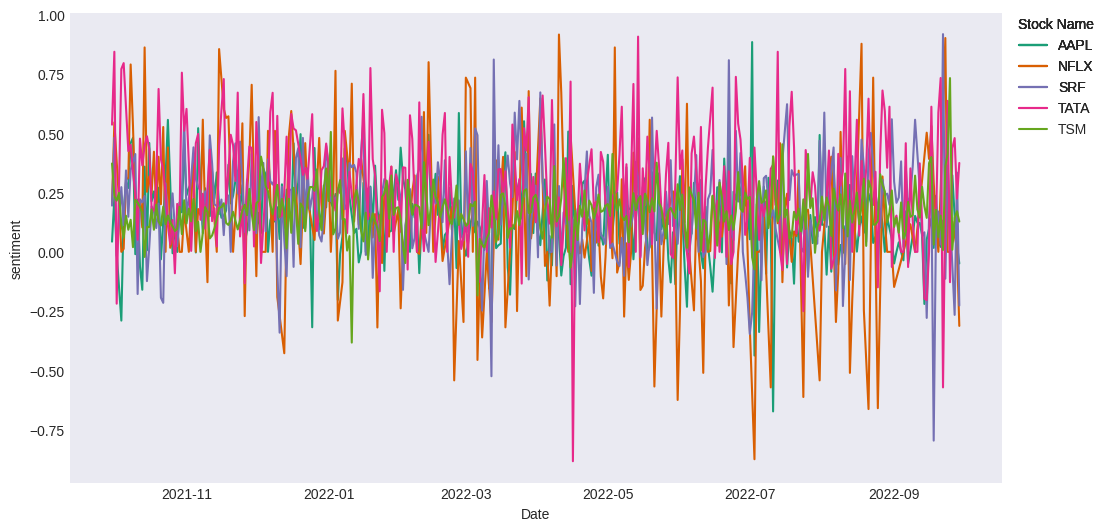

In [ ]:
# @title Date vs sentiment

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['sentiment']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = t_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Stock Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Stock Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('sentiment')

**Get final dataset for training**

In [ ]:
df2=pd.read_csv('/content/stock_yfinance_data_final.csv')

In [ ]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,30-09-2021,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,SRF
1,01-10-2021,164.450501,165.458496,162.796997,164.162994,164.162994,56712000,SRF
2,04-10-2021,163.969498,163.999496,158.812500,159.488998,159.488998,90462000,SRF
3,05-10-2021,160.225006,163.036499,160.123001,161.050003,161.050003,65384000,SRF
4,06-10-2021,160.676498,163.216995,159.931000,163.100494,163.100494,50660000,SRF


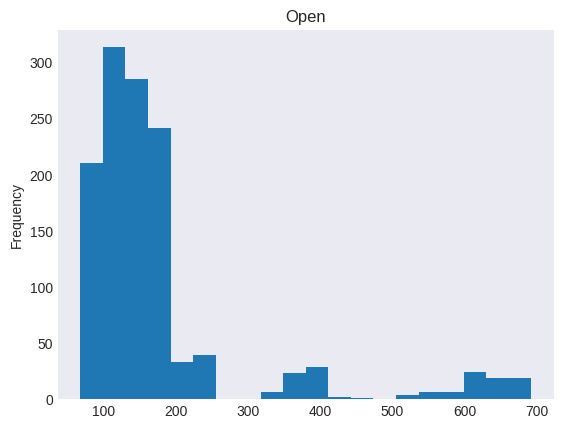

In [ ]:
# @title Open

from matplotlib import pyplot as plt
df2['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
stock_df = df2[df2['Stock Name'] == stock_name]
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

In [ ]:
final_df = stock_df.join(t_df, how="left", on="Date", lsuffix='_stock', rsuffix='_t') # Add suffixes to differentiate columns from the two dataframes
# final_df = final_df.drop(columns=['Stock Name'])
print(final_df.shape)


(252, 11)


In [ ]:
stock_data = df2
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Date'] = stock_data['Date'].dt.date
final_data = pd.merge(t_df, stock_data, on=['Date', 'Stock Name'], how='inner')
print(final_data.shape)

(954, 9)


In [ ]:
final_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment_score
1008,2021-09-30,112.430000,113.349998,111.650002,111.650002,109.457535,6433400,0.388765
1009,2021-10-01,112.000000,112.300003,110.300003,111.559998,109.369293,5315200,0.224467
1010,2021-10-04,111.000000,111.430000,108.519997,109.019997,106.879173,8514500,0.076869
1011,2021-10-05,109.800003,110.349998,109.220001,109.260002,107.114464,8039600,0.14981
1012,2021-10-06,108.440002,109.519997,107.580002,109.339996,107.192886,7553600,0.228236


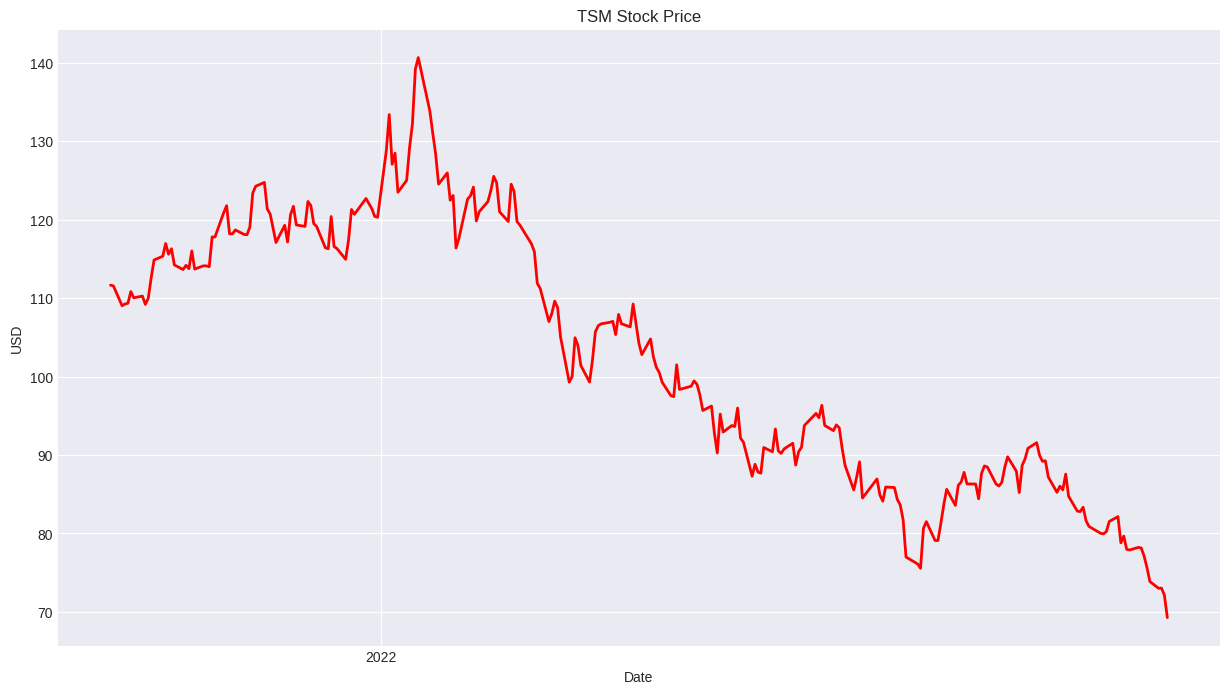

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(final_df['Date'], final_df['Close'], color='red', linewidth=2) # Increased linewidth for visibility

ax.set(xlabel="Date", ylabel="USD", title=f"{stock_name} Stock Price")

# Format x-axis for better date representation
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Add a grid for better readability
ax.grid(True)

plt.show()

In [ ]:
def get_tech_ind(data):
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean() #Close column
    data['MA20'] = data.iloc[:,4].rolling(window=20).mean() #Close Column

    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data

In [ ]:
tech_df = get_tech_ind(final_df)
dataset = tech_df.iloc[20:,:].reset_index(drop=True)
dataset.head()

,Date_stock,Open,High,Low,Close,Adj Close,Volume,Stock Name_stock,Date_t,Stock Name_t,sentiment,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2021-10-28,113.660004,116.019997,113.540001,116.010002,113.731911,5714300,TSM,NaN,NaN,NaN,114.812857,112.6450,-0.593961,2.739528,118.124057,107.165943,115.299548,4.745019
1,2021-10-29,114.070000,114.190002,113.220001,113.699997,111.467270,7118900,TSM,NaN,NaN,NaN,114.542858,112.7520,-0.573929,2.736711,118.225421,107.278578,114.233181,4.724729
2,2021-11-01,113.580002,114.339996,113.349998,114.120003,111.879028,4955700,TSM,NaN,NaN,NaN,114.232858,113.0070,-0.443097,2.605108,118.217217,107.796783,114.157729,4.728449
3,2021-11-02,113.589996,114.800003,113.540001,114.110001,111.869225,4479700,TSM,NaN,NaN,NaN,114.215715,113.2495,-0.331955,2.459629,118.168757,108.330243,114.125910,4.728361
4,2021-11-03,113.440002,114.099998,112.730003,114.010002,111.771179,6073000,TSM,NaN,NaN,NaN,114.268572,113.4830,-0.220870,2.284379,118.051759,108.914242,114.048638,4.727476


In [ ]:
time_horizon = 1

dataset['pct_change'] = (dataset['Close'].shift(-time_horizon) - dataset['Close']) / dataset['Close'] * 100


increase_threshold = 0
decrease_threshold = 0


def label_data(row):
    if row['pct_change'] > increase_threshold:
        return 'increase'
    elif row['pct_change'] < decrease_threshold:
        return 'decrease'
    else:
        return 'no change'

dataset['label'] = dataset.apply(label_data, axis=1)


dataset = dataset.dropna(subset=['pct_change'])

dataset = dataset.drop(columns=['pct_change'])


dataset.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment_score,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum,label
2021-10-28,113.660004,116.019997,113.540001,116.010002,113.731911,5714300,0.144477,114.812857,112.6450,-0.593961,2.739528,118.124057,107.165943,115.299548,4.745019,decrease
2021-10-29,114.070000,114.190002,113.220001,113.699997,111.467270,7118900,0.270117,114.542858,112.7520,-0.573929,2.736711,118.225421,107.278578,114.233181,4.724729,increase
2021-11-01,113.580002,114.339996,113.349998,114.120003,111.879028,4955700,0.120133,114.232858,113.0070,-0.443097,2.605108,118.217217,107.796783,114.157729,4.728449,decrease
2021-11-02,113.589996,114.800003,113.540001,114.110001,111.869225,4479700,0.235243,114.215715,113.2495,-0.331955,2.459629,118.168757,108.330243,114.125910,4.728361,decrease
2021-11-03,113.440002,114.099998,112.730003,114.010002,111.771179,6073000,0.09619,114.268572,113.4830,-0.220870,2.284379,118.051759,108.914242,114.048638,4.727476,increase


In [ ]:
dataset['label'] = dataset['label'].map({'increase': 1, 'decrease': 0})
df3 = dataset
df3
y = df3["label"]
y

2021-10-28    0
2021-10-29    1
2021-11-01    0
2021-11-02    0
2021-11-03    1
             ..
2022-09-22    0
2022-09-23    0
2022-09-26    1
2022-09-27    0
2022-09-28    0
Name: label, Length: 231, dtype: int64

In [ ]:
x = dataset.drop(['label'], axis = 1)

In [ ]:
df3.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment_score,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum,label,pct_change
2021-10-28,113.660004,116.019997,113.540001,116.010002,113.731911,5714300,0.144477,114.812857,112.6450,-0.593961,2.739528,118.124057,107.165943,115.299548,4.745019,decrease,-1.991212
2021-10-29,114.070000,114.190002,113.220001,113.699997,111.467270,7118900,0.270117,114.542858,112.7520,-0.573929,2.736711,118.225421,107.278578,114.233181,4.724729,increase,0.369398
2021-11-01,113.580002,114.339996,113.349998,114.120003,111.879028,4955700,0.120133,114.232858,113.0070,-0.443097,2.605108,118.217217,107.796783,114.157729,4.728449,decrease,-0.008765
2021-11-02,113.589996,114.800003,113.540001,114.110001,111.869225,4479700,0.235243,114.215715,113.2495,-0.331955,2.459629,118.168757,108.330243,114.125910,4.728361,decrease,-0.087633
2021-11-03,113.440002,114.099998,112.730003,114.010002,111.771179,6073000,0.09619,114.268572,113.4830,-0.220870,2.284379,118.051759,108.914242,114.048638,4.727476,increase,3.315498


**LogisticRegression**

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


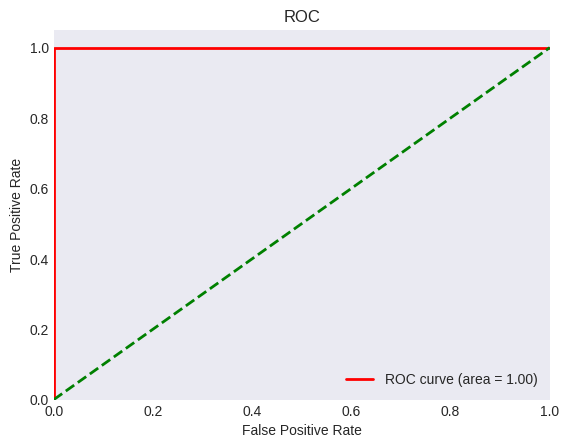

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'df3' is your DataFrame with the label column
X = df3.drop(['label'], axis=1)
y = df3['label']

# Convert y to numeric BEFORE dropping missing values
y = y.map({'increase': 1, 'decrease': 0})

# Drop rows with missing values in BOTH X and y
X = X.dropna()
y = y[X.index]  # Align y with the remaining indices in X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values (NaN) with the mean of each column
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean()) # Use the mean from the training set to avoid data leakage

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [1000]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_logreg = grid_search.best_estimator_

y_pred = best_logreg.predict(X_test_scaled)
y_pred_proba = best_logreg.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


**SVM**

Accuracy: 0.9565217391304348
Precision: 0.9473684210526315
Recall: 0.9473684210526315
F1 Score: 0.9473684210526315
ROC AUC: 0.9970760233918129


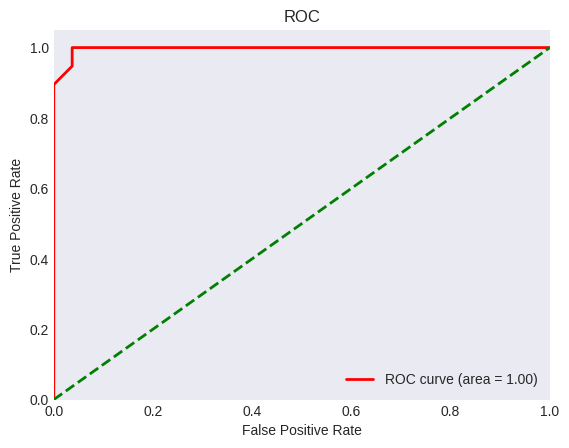

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'df3' is your DataFrame with the label column
X = df3.drop(['label'], axis=1)
y = df3['label']

# Convert y to numeric BEFORE dropping missing values
y = y.map({'increase': 1, 'decrease': 0})

# Drop rows with missing values in BOTH X and y
X = X.dropna()
y = y[X.index]  # Align y with the remaining indices in X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values (NaN) with the mean of each column
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean()) # Use the mean from the training set to avoid data leakage

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(probability=True, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test_scaled)
y_pred_proba = best_svm.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
# Set pos_label to 1 to match the true labels
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def tech_ind(dataset):
    plt.style.use('seaborn-dark')  # Applying the 'seaborn-dark' style

    fig, ax = plt.subplots(figsize=(15, 8), dpi=200)

    # Set custom background color
    fig.patch.set_facecolor('#e0e0e0')  # Light grey background for the figure
    ax.set_facecolor('#f0f0f0')         # Slightly different grey for the plot area

    ax.plot(dataset['Date'], dataset['MA7'], label='Moving Average (7 days)', color='y', linestyle='-', marker='o', markersize=3)
    ax.plot(dataset['Date'], dataset['Close'], label='Closing Price', color='green', linestyle='-', marker='o', markersize=3)
    ax.plot(dataset['Date'], dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.', marker='o', markersize=3)

    ax.set_xlabel('Date', color='#333333')
    ax.set_ylabel('Price', color='#333333')
    ax.set_title('Technical Indicators', color='#333333')
    ax.legend()

    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)  # Ensure grid is behind the plot elements

    plt.xticks(rotation=45, color='#333333')
    plt.yticks(color='#333333')
    plt.tight_layout()

    # Annotate example
    ax.annotate('Example Annotation', xy=(dataset['Date'].iloc[10], dataset['Close'].iloc[10]), xytext=(dataset['Date'].iloc[20], dataset['Close'].iloc[20]),
                arrowprops=dict(facecolor='black', arrowstyle='->'))

    plt.show()



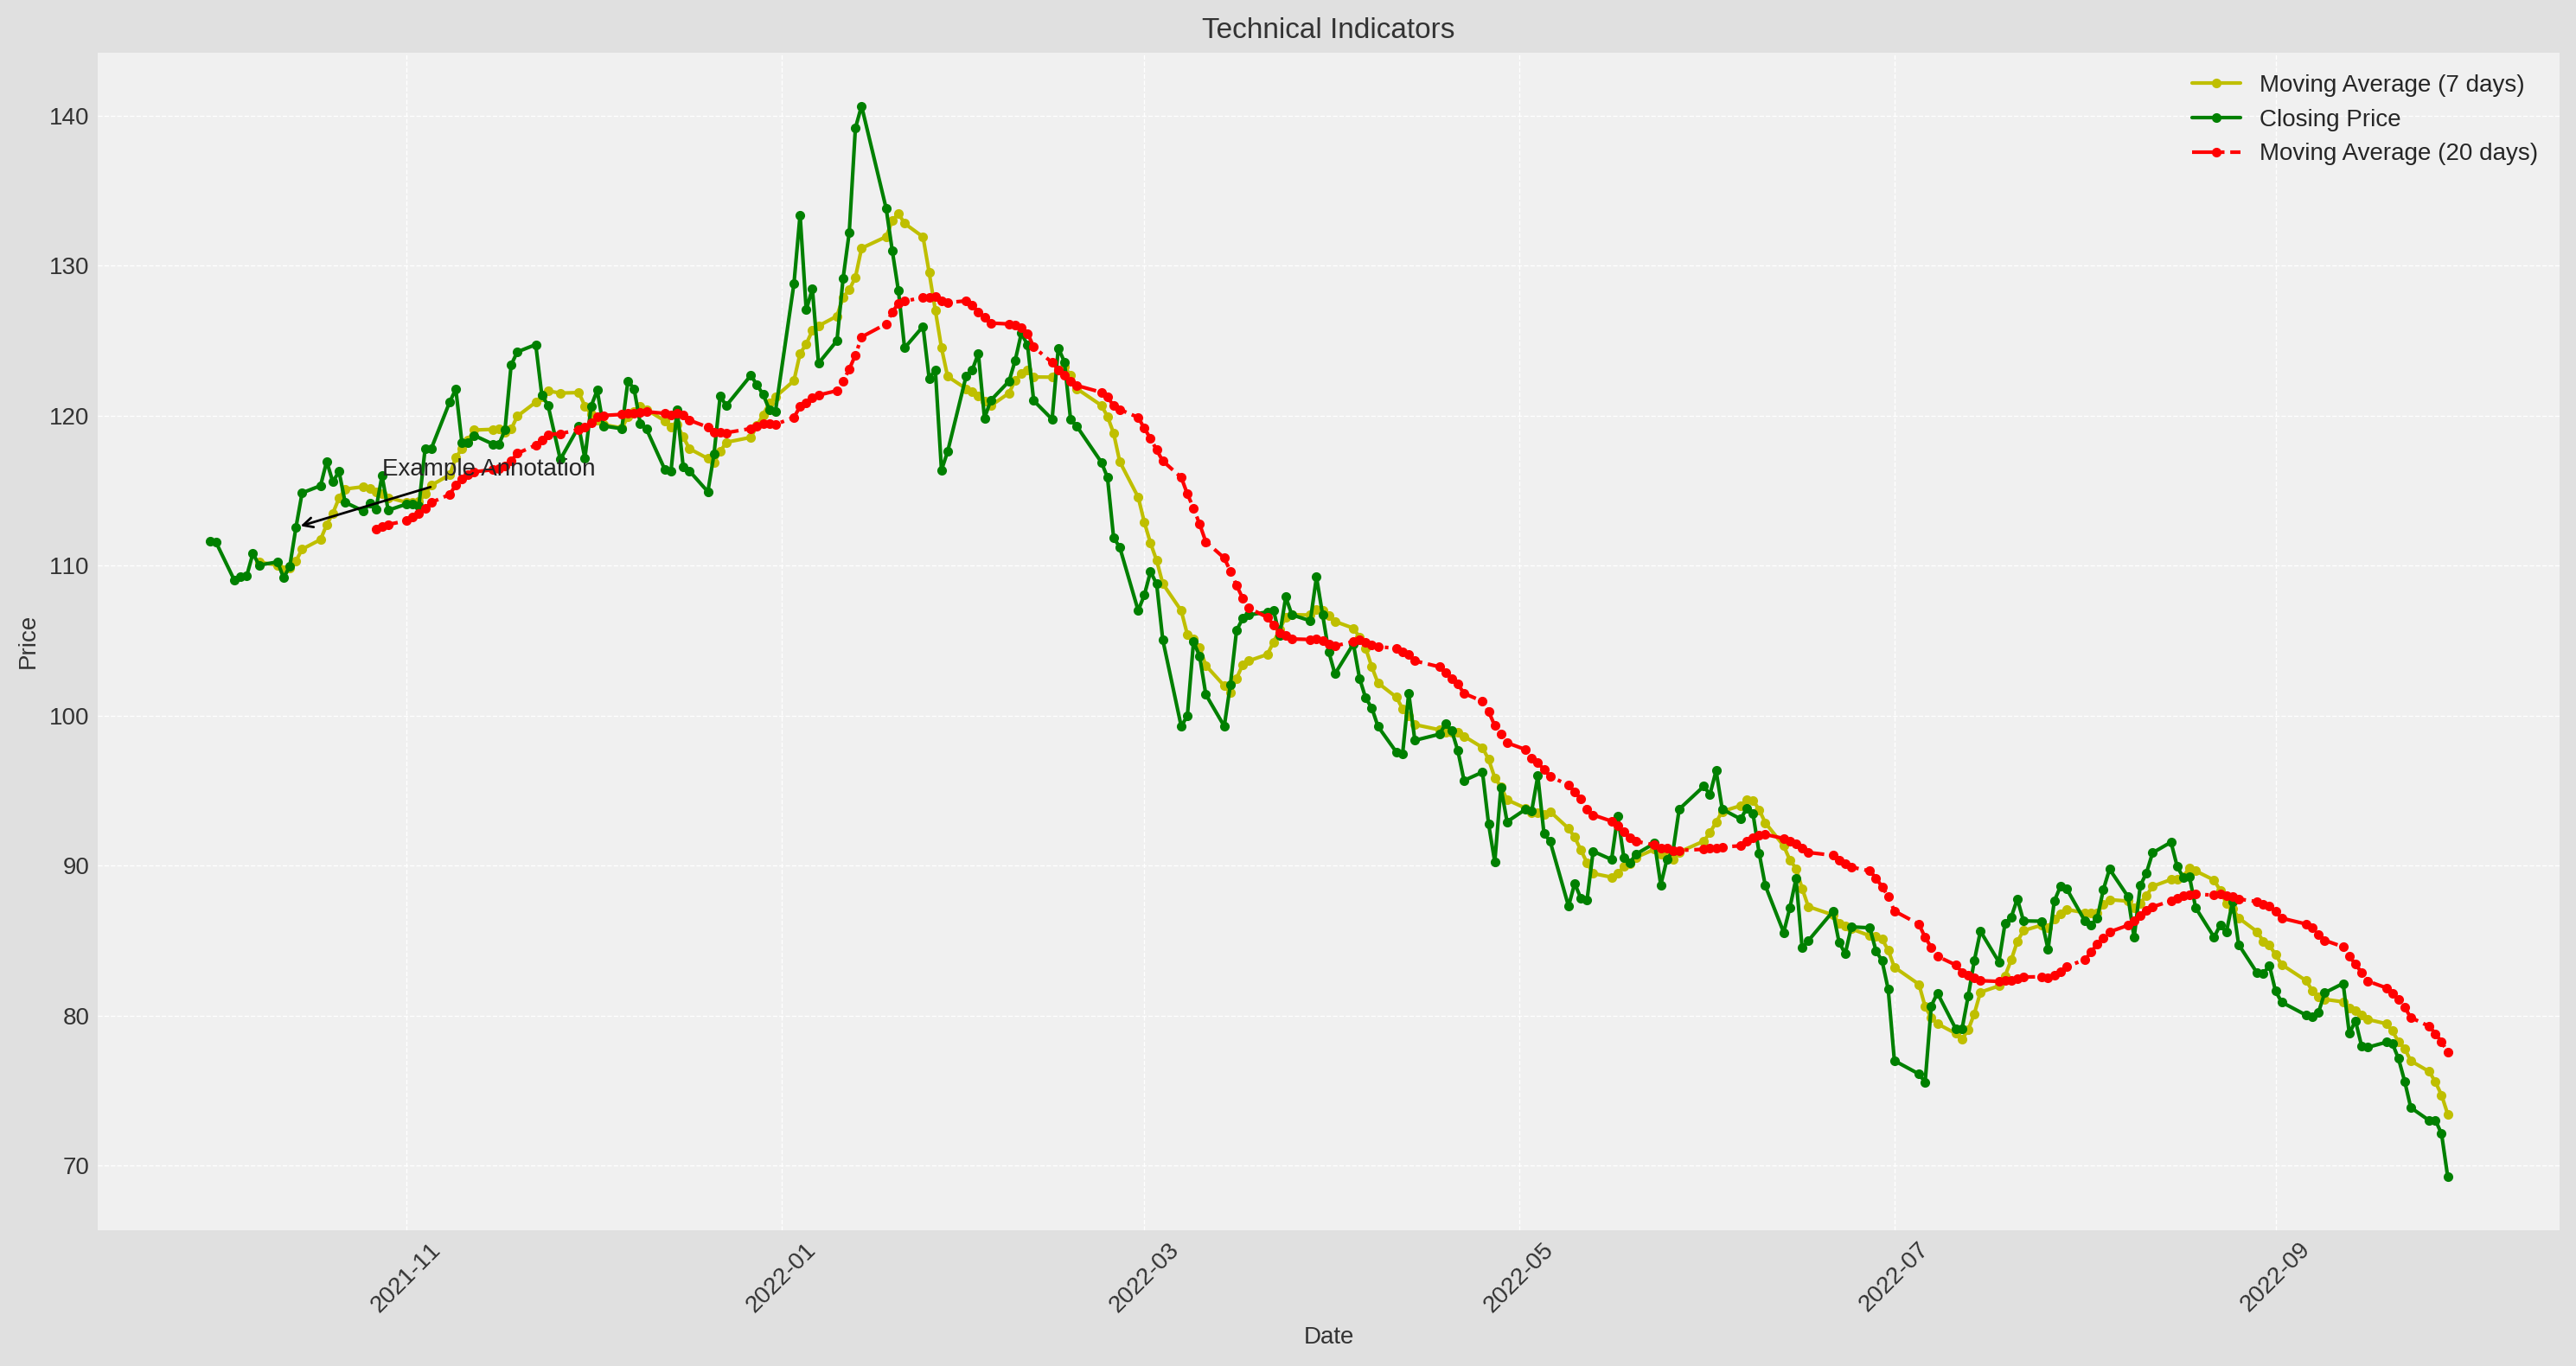

In [ ]:
tech_ind(tech_df)

In [ ]:
dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill()])

In [ ]:
datetime_series = pd.to_datetime(dataset['Date_stock'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='Date_stock')
dataset = dataset.drop(columns='Date_stock')

In [ ]:
def normalize_data(df, range, target_column):

    '''
    df: dataframe object
    range: type tuple -> (lower_bound, upper_bound)
        lower_bound: int
        upper_bound: int
    target_column: type str -> should reflect closing price of stock
    '''

    target_df_series = pd.DataFrame(df[target_column])
    data = pd.DataFrame(df.iloc[:, :])

    X_scaler = MinMaxScaler(feature_range=range)
    y_scaler = MinMaxScaler(feature_range=range)
    X_scaler.fit(data)
    y_scaler.fit(target_df_series)

    X_scale_dataset = X_scaler.fit_transform(data)
    y_scale_dataset = y_scaler.fit_transform(target_df_series)

    dump(X_scaler, open('X_scaler.pkl', 'wb'))
    dump(y_scaler, open('y_scaler.pkl', 'wb'))

    return (X_scale_dataset,y_scale_dataset)

In [ ]:
def batch_data(x_data,y_data, batch_size, predict_period):
    X_batched, y_batched, yc = list(), list(), list()

    for i in range(0,len(x_data),1):
        x_value = x_data[i: i + batch_size][:, :]
        y_value = y_data[i + batch_size: i + batch_size + predict_period][:, 0]
        yc_value = y_data[i: i + batch_size][:, :]
        if len(x_value) == batch_size and len(y_value) == predict_period:
            X_batched.append(x_value)
            y_batched.append(y_value)
            yc.append(yc_value)

    return np.array(X_batched), np.array(y_batched), np.array(yc)

In [ ]:
def split_train_test(data):
    train_size = len(data) - 20
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [ ]:
def predict_index(dataset, X_train, batch_size, prediction_period):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[batch_size: X_train.shape[0] + batch_size + prediction_period, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + batch_size:, :].index

    return train_predict_index, test_predict_index

In [ ]:
def normalize_data(df, range, target_column):

    '''
    df: dataframe object
    range: type tuple -> (lower_bound, upper_bound)
        lower_bound: int
        upper_bound: int
    target_column: type str -> should reflect closing price of stock
    '''

    # Extract numerical columns for scaling
    numerical_columns = df.select_dtypes(include=['number']).columns

    target_df_series = pd.DataFrame(df[target_column])
    data = pd.DataFrame(df[numerical_columns]) # Select only numerical columns

    X_scaler = MinMaxScaler(feature_range=range)
    y_scaler = MinMaxScaler(feature_range=range)
    X_scaler.fit(data)
    y_scaler.fit(target_df_series)

    X_scale_dataset = X_scaler.fit_transform(data)
    y_scale_dataset = y_scaler.fit_transform(target_df_series)

    dump(X_scaler, open('X_scaler.pkl', 'wb'))
    dump(y_scaler, open('y_scaler.pkl', 'wb'))

    return (X_scale_dataset,y_scale_dataset)

In [ ]:
input_dim = X_train.shape[1]
feature_size = X_train.shape[0] # Access the number of rows (samples) in the DataFrame
output_dim = y_train.shape[0] # Access the length of the Series

In [ ]:
def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential([LSTM(units = 1024, return_sequences = True,
                                    input_shape=(input_dim, feature_size),recurrent_dropout = 0.3),
                               LSTM(units = 512, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 256, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 64, recurrent_dropout = 0.3),
                               Dense(32),
                               Dense(16),
                               Dense(8),
                               Dense(units=output_dim)])
    return model

In [ ]:
def make_discriminator_model(input_dim):
    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(8, input_shape=(input_dim+1, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(16, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(32, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=1, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    #cnn_net.add(Flatten())
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net

In [ ]:
def discriminator_loss(real_output, fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    real_loss = loss_f(tf.ones_like(real_output), real_output)
    fake_loss = loss_f(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    loss = loss_f(tf.ones_like(fake_output), fake_output)
    return loss

In [ ]:
@tf.function

def train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(real_x, training=True)
        generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
        d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
        real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
        d_real_input = tf.concat([real_y_reshape, yc], axis=1)

        real_output = discriminator(d_real_input, training=True)
        fake_output = discriminator(d_fake_input, training=True)

        g_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    g_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    d_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': g_loss}

In [ ]:
def train(real_x, real_y, yc, Epochs, generator, discriminator, g_optimizer, d_optimizer, checkpoint = 50):
    train_info = {}
    train_info["discriminator_loss"] = []
    train_info["generator_loss"] = []

    for epoch in tqdm(range(Epochs)):
        real_price, fake_price, loss = train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer)
        G_losses = []
        D_losses = []
        Real_price = []
        Predicted_price = []
        D_losses.append(loss['d_loss'].numpy())
        G_losses.append(loss['g_loss'].numpy())
        Predicted_price.append(fake_price.numpy())
        Real_price.append(real_price.numpy())

        #Save model every X checkpoints
        if (epoch + 1) % checkpoint == 0:
            tf.keras.models.save_model(generator, f'./models_gan/{stock_name}/generator_V_%d.h5' % epoch)
            tf.keras.models.save_model(discriminator, f'./models_gan/{stock_name}/discriminator_V_%d.h5' % epoch)
            print('epoch', epoch + 1, 'discriminator_loss', loss['d_loss'].numpy(), 'generator_loss', loss['g_loss'].numpy())

        train_info["discriminator_loss"].append(D_losses)
        train_info["generator_loss"].append(G_losses)

    Predicted_price = np.array(Predicted_price)
    Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
    Real_price = np.array(Real_price)
    Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

    plt.subplot(2,1,1)
    plt.plot(train_info["discriminator_loss"], label='Disc_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Discriminator Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(train_info["generator_loss"], label='Gen_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Generator Loss')
    plt.legend()

    plt.show()

    return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(Real_price)

In [ ]:
def plot_results(Real_price, Predicted_price, index_train):
    X_scaler = load(open('/content/X_scaler.pkl', 'rb'))
    y_scaler = load(open('/content/y_scaler.pkl', 'rb'))
    train_predict_index = index_train

    rescaled_Real_price = y_scaler.inverse_transform(Real_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color = 'r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- Train RMSE -- ', RMSE)

In [ ]:
## Test Code

@tf.function

def eval_op(generator, real_x):
    generated_data = generator(real_x, training = False)

    return generated_data

In [ ]:
def plot_test_data(Real_test_price, Predicted_test_price, index_test):
    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = index_test

    rescaled_Real_price = y_scaler.inverse_transform(Real_test_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_test_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=test_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=test_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('Test RMSE: ', RMSE)

    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], color='#00008B')
    plt.plot(predict_result["predicted_mean"], color = '#8B0000', linestyle='--')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title(f"Prediction on test data for {stock_name}", fontsize=20)
    plt.show()

In [157]:
learning_rate = 5e-4
epochs = 500

g_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
d_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)

# Convert X_train to a numpy array to correctly access shape
X_train_array = X_train.values

# Check the number of dimensions of X_train_array
print(X_train_array.ndim)

# If X_train_array is 2D, adjust the call to make_generator_model
if X_train_array.ndim == 2:
    # Pass a dummy value for feature_size if it's not used in the 2D case
    generator = make_generator_model(X_train_array.shape[1], output_dim, 0) # Added a dummy value for feature_size
else:
    generator = make_generator_model(X_train_array.shape[1], output_dim, X_train_array.shape[2])

discriminator = make_discriminator_model(X_train_array.shape[1])

2


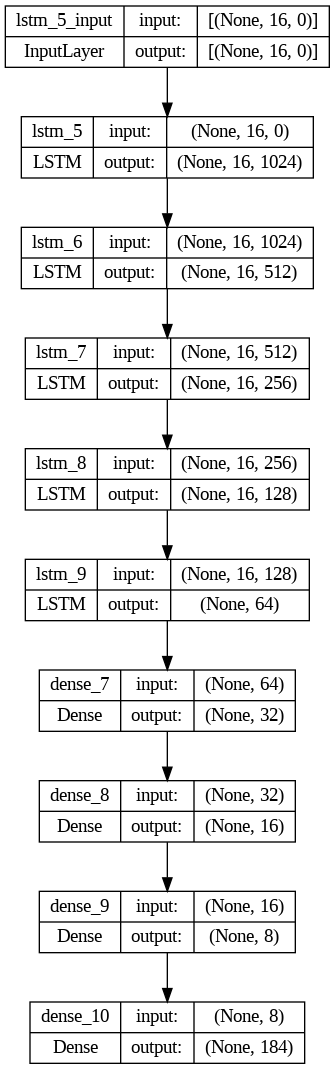

In [158]:
plot_model(generator, to_file='generator_keras_model.png', show_shapes=True)

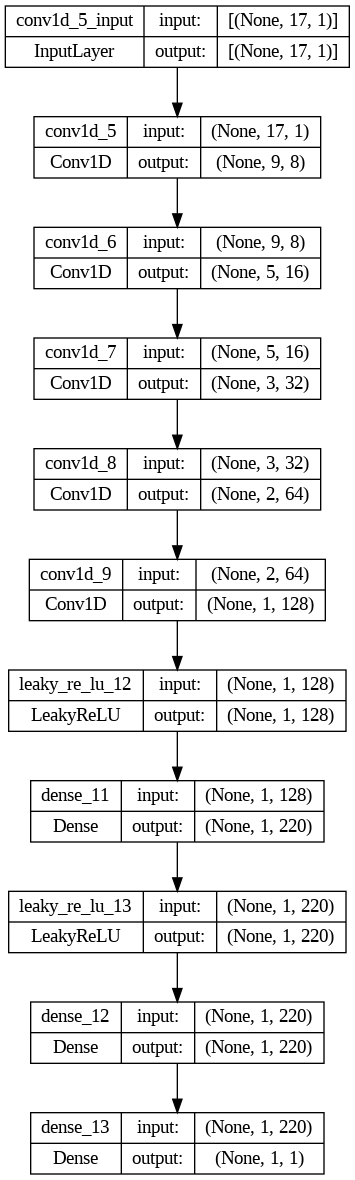

In [159]:
tf.keras.utils.plot_model(discriminator, to_file='discriminator_keras_model.png', show_shapes=True)